# Load the libraries and the image we are going to use

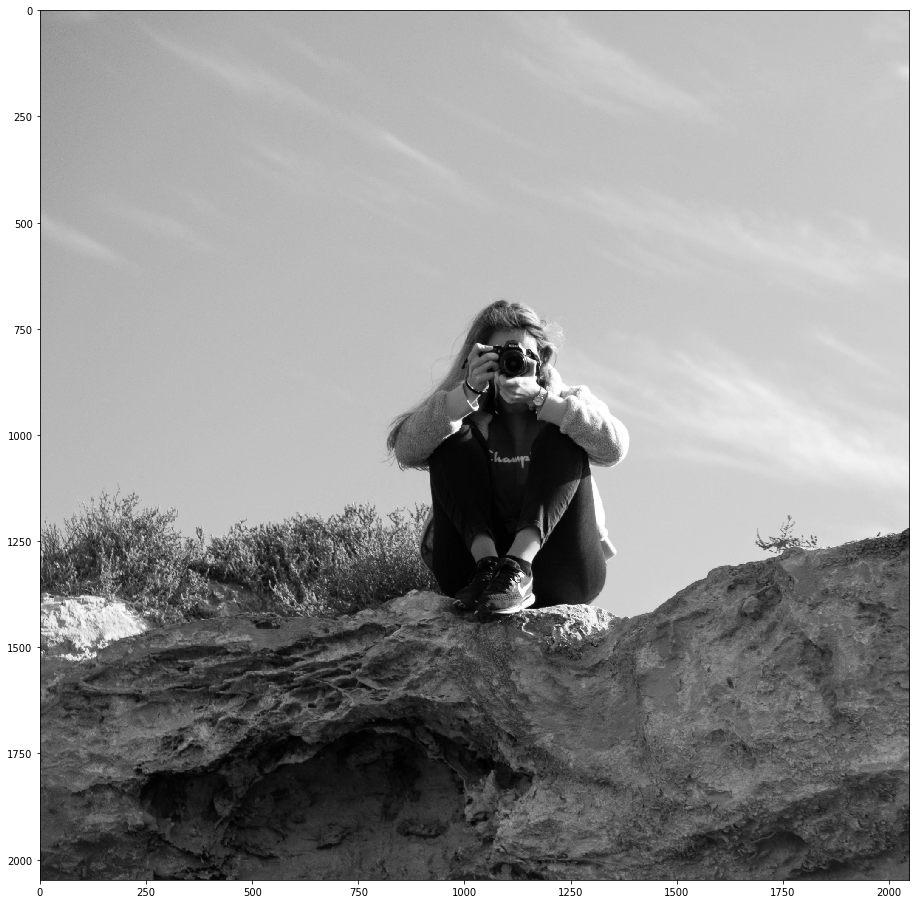

In [1]:
import cv2 
import numpy as np 
import random
from twoDDWT import *


%matplotlib inline 
from matplotlib import pyplot as plt
import pylab 
pylab.rcParams['figure.figsize'] = (20, 16) 

input_image=cv2.imread('data/Photographe.jpg',cv2.IMREAD_GRAYSCALE)

img = cv2.resize(input_image, (2048,2048), interpolation = cv2.INTER_AREA)  #So we have a size of 2^j for the transform.

plt.imshow(img,cmap='gray')

In [3]:
def mse(imageA, imageB):
    err = np.sum(np.sqrt((imageA.astype("float") - imageB.astype("float")) ** 2))
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

# We are going to add different noises at the different level

## Add different levels of Gausian Noise

0.0
9.385668516159058
18.951337575912476
27.877947568893433
35.97870326042175
43.323631048202515
49.99223208427429
55.99888491630554
61.45856809616089


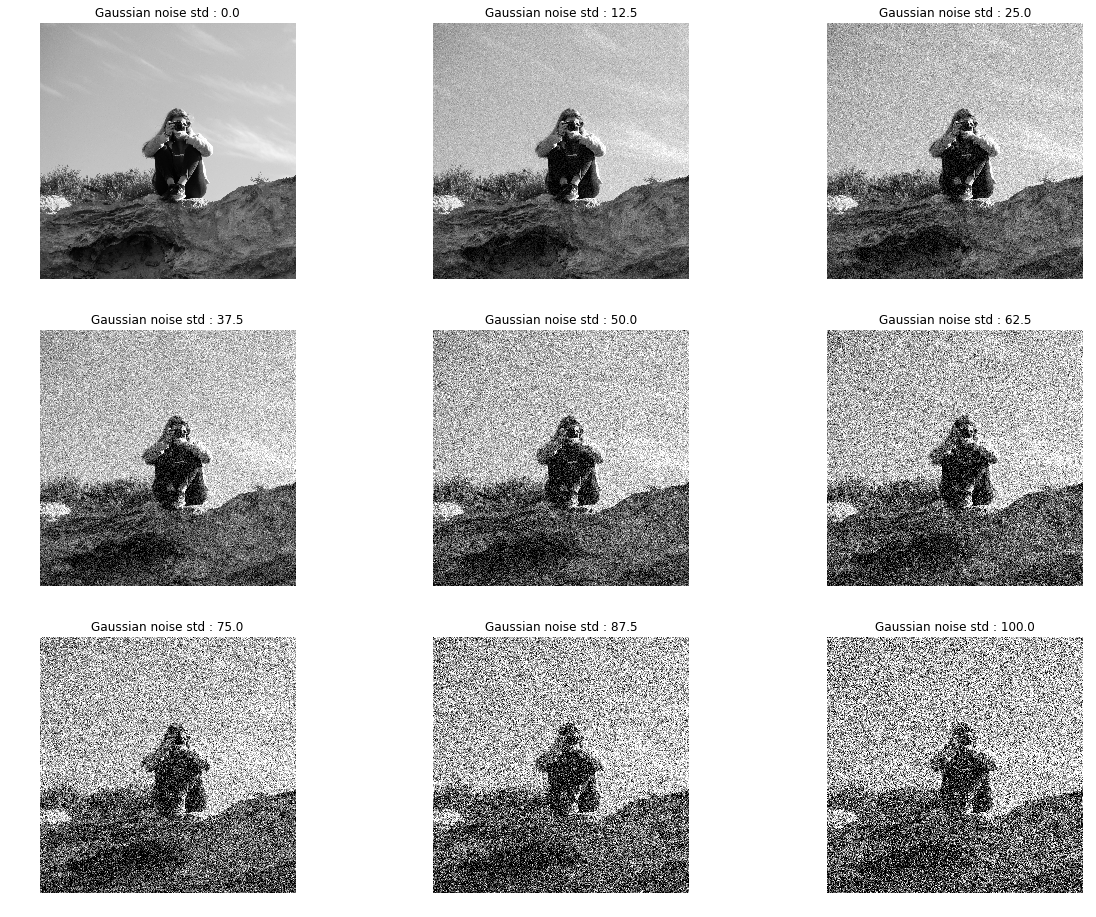

In [4]:
mean = 0.0  
Std = np.linspace(0,100,9)
Noisy_gauss = []
for std in Std:
    noisy_img = img + np.random.normal(mean, std, img.shape).astype(int)
    noisy_clip = np.clip(noisy_img, 0, 255)
    Noisy_gauss.append(noisy_clip)
    print(mse(noisy_clip,img))

pylab.rcParams['figure.figsize'] = (20, 16) 
for i in range(len(Std)):
    show = Noisy_gauss[i]
    plt.subplot(3,3,i+1)
    plt.title("Gaussian noise std : "+str(Std[i]))
    plt.axis('off')
    plt.imshow(show,cmap='gray')
plt.savefig("data/Gaussian noise")

# Let's see the effects of differents filters


## Gaussian blurr

1.681206464767456
3.517794132232666
4.752929925918579
5.874346494674683
7.259443998336792
9.163564682006836
11.61225414276123
14.286761045455933
17.204301357269287


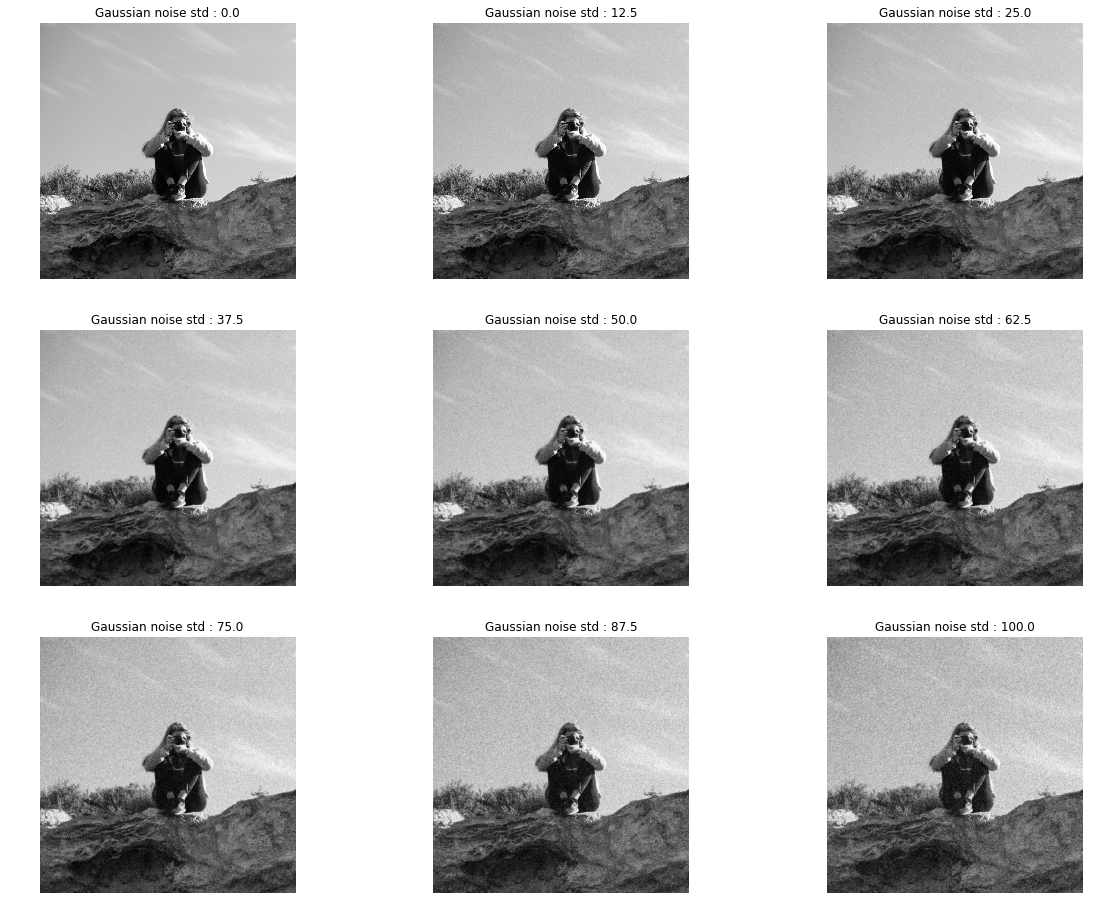

In [6]:
Gaussian_gauss = []

for i in range(len(Std)):
    mini = np.inf
    for sig in range(1,20):
        gaussian_ = np.uint8(Noisy_gauss[i])                      #Problem of unit 
        blurred_ = cv2.GaussianBlur(gaussian_,(0,0),sigmaX = sig)
        if mse(blurred_,img)< mini:
            mini = mse(blurred_,img)
            best = blurred_
    Gaussian_gauss.append(best)
    print(mini)

    
pylab.rcParams['figure.figsize'] = (20, 16) 
for i in range(len(Std)):
    show = Gaussian_gauss[i]
    plt.subplot(3,3,i+1)
    plt.title("Gaussian noise std : "+str(Std[i]))
    plt.axis('off')
    plt.imshow(show,cmap='gray')
plt.savefig("data/Gaussian noise filtered by Gaussian")

## Discrete Wavelet Transform

In [73]:
def thresh(transform_input,scale, typ = "hard"):
    transform = np.copy(transform_input)
    (l,c) = np.shape(transform)
    for i in range(scale):
        diagonal = np.copy(transform[l//2:l,c//2:c])   #diagonal
        vertical = np.copy(transform[:l//2,c//2:c])    #vertical
        horizontal = np.copy(transform[l//2:l,:c//2])  #horizontal

        
        sigma_diago = np.median(np.abs(diagonal))/0.6745 #Donoho paper
        sigma_verti = np.median(np.abs(vertical))/0.6745
        sigma_hori = np.median(np.abs(horizontal))/0.6745 
        
        length = (l//2) * (c//2)  
        thresh_diago = sigma_diago * np.sqrt(2*np.log10(length))
        thresh_verti = sigma_verti * np.sqrt(2*np.log10(length))
        thresh_hori = sigma_hori * np.sqrt(2*np.log10(length))
        
        
        diagonal[np.abs(diagonal)<thresh_diago] = 0
        vertical[np.abs(vertical)<thresh_verti] = 0
        horizontal[np.abs(horizontal)<thresh_hori] = 0
        
        if typ == "soft":
            diagonal = np.sign(diagonal)*np.abs(diagonal-thresh_diago)
            vertical = np.sign(vertical)*np.abs(vertical-thresh_diago)
            horizontal = np.sign(horizontal)*np.abs(horizontal-thresh_diago)
            
            
        transform[l//2:l,c//2:c] = np.copy(diagonal)
        transform[:l//2,c//2:c] = np.copy(vertical)  
        transform[l//2:l,:c//2] = np.copy(horizontal) 
        
        l = l//2
        c = c//2
        

        
    return transform


current image:  0
    scale: 1 and type :  soft  : 0.9999879397539855
        New mini:  0.9999879397539855 found for scale: 1 and type :  soft
    scale: 1 and type :  hard  : 0.8188061714172364
        New mini:  0.8188061714172364 found for scale: 1 and type :  hard
    scale: 2 and type :  soft  : 1.3043618460449564
    scale: 2 and type :  hard  : 0.974570006132126
    scale: 3 and type :  soft  : 1.603662758367509
    scale: 3 and type :  hard  : 1.1541810408234596
    scale: 4 and type :  soft  : 1.8327326195005504
    scale: 4 and type :  hard  : 1.3219681456685066
    scale: 5 and type :  soft  : 2.165474746474551
    scale: 5 and type :  hard  : 1.5821609324775638
    scale: 6 and type :  soft  : 2.7965905749250792
    scale: 6 and type :  hard  : 2.0765848652226846
    scale: 7 and type :  soft  : 3.8869909567852576
    scale: 7 and type :  hard  : 2.9809528801706584
    scale: 8 and type :  soft  : 5.191494647894231
    scale: 8 and type :  hard  : 4.0609832251357085
    sc

    scale: 2 and type :  soft  : 13.602750311861515
        New mini:  13.602750311861515 found for scale: 2 and type :  soft
    scale: 2 and type :  hard  : 13.543225079774857
        New mini:  13.543225079774857 found for scale: 2 and type :  hard
    scale: 3 and type :  soft  : 10.835755828421739
        New mini:  10.835755828421739 found for scale: 3 and type :  soft
    scale: 3 and type :  hard  : 10.622628644108772
        New mini:  10.622628644108772 found for scale: 3 and type :  hard
    scale: 4 and type :  soft  : 10.518670465852033
        New mini:  10.518670465852033 found for scale: 4 and type :  soft
    scale: 4 and type :  hard  : 10.081507531926036
        New mini:  10.081507531926036 found for scale: 4 and type :  hard
    scale: 5 and type :  soft  : 10.830827898984994
    scale: 5 and type :  hard  : 10.204717841930693
    scale: 6 and type :  soft  : 11.169829645667779
    scale: 6 and type :  hard  : 10.375430889194844
    scale: 7 and type :  soft  : 11.

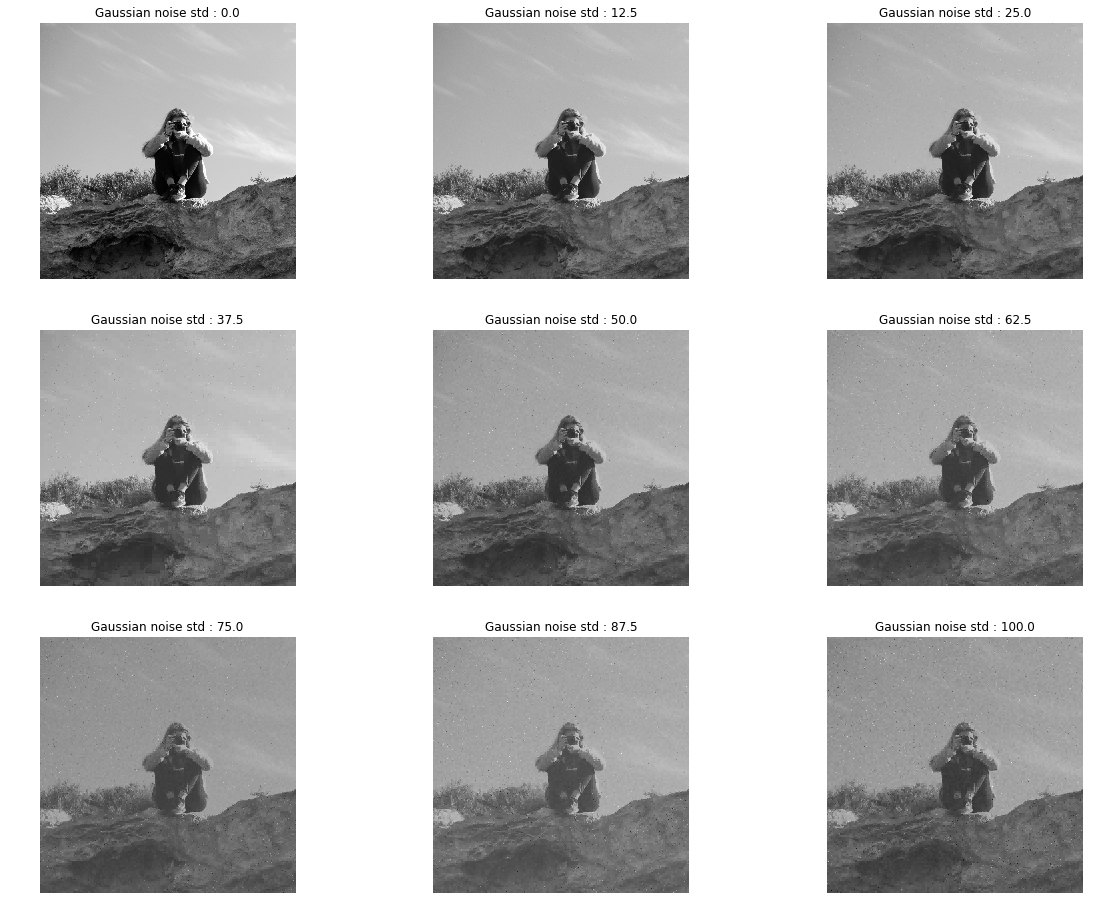

In [76]:
Gaussian_DWT = []


for i in range(len(Std)):
    print("current image: ",i)
    gaussian_ = Noisy_gauss[i]
    gaussian_ = gaussian_.astype('float64')
    mini = np.inf
    for scale in range(1,12):
        transform = twoDDWT(gaussian_,scale)
        for typ in ["soft","hard"]:
            transform_tresh = thresh(transform,scale,typ)
            reconstruct = inverse_twoDDWT(transform_tresh,scale)
            error = mse(reconstruct,img)
            print("    scale:",scale,"and type : ",typ," :",error)

            if error < mini:
                mini = error
                best = reconstruct
                print("        New mini: ",mini, "found for scale:",scale,"and type : ",typ)
        
    Gaussian_DWT.append(best)

    
pylab.rcParams['figure.figsize'] = (20, 16) 
for i in range(len(Std)):
    show = Gaussian_DWT[i]
    plt.subplot(3,3,i+1)
    plt.title("Gaussian noise std : "+str(Std[i]))
    plt.axis('off')
    plt.imshow(show,cmap='gray')
plt.savefig("data/Gaussian noise filtered DWT dohono method")

# Compare the methods on the sky only

In [85]:
for i in range(len(Std)):
    print(mse(Gaussian_DWT[i][:500,:500],img[:500,:500]),mse(Gaussian_gauss[i][:500,:500],img[:500,:500]))
    

0.9463020000000002 1.03632
1.9588675 2.975188
2.1899445312499997 3.10104
2.4860454453124974 3.1005
3.835360843749999 4.009216
4.985372499999997 5.003948
6.914721281250002 6.618772
8.347259468750003 8.181828
10.685025687500005 10.397124
